# Prediction of Admission

## <i>Description of Dataset</i>

The dataset contains several parameters which are considered important during the application for Masters Programs.

## <i>List of Attributes</i>

<i><b>GRE Scores </i></b>( out of 340 ) <br>
<i><b>TOEFL Scores </i></b>( out of 120 )<br>
<i><b>University Rating </i></b>( out of 5 )<br>
<i><b>Statement of Purpose </i></b>( out of 5 )<br>
<i><b>Letter of Recommendation Strength </i></b>( out of 5 )<br>
<i><b>Undergraduate GPA </i></b>( out of 10 )<br>
<i><b>Research Experience </i></b>( either 0 or 1 )<br>
<i><b>Chance of Admit </i></b>( ranging from 0 to 1 )<br>

## <i>Objective</i>

The objective of this project is to perform data cleansing, and required transformations and build a predictive model which predicts about their chances of admission for a particular university.

### Import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as stm
import scipy.stats as stats
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor

### Reading data

In [2]:
warnings.filterwarnings("ignore") # to ignore warnings
ds = pd.read_csv(r"C:\Users\intel\Desktop\Python\Admission_Predict.csv")
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#removing first column i.e. serial no.
ds1 = ds.iloc[:,1:9]
ds1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Checking for null values

In [4]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


### Checking the dimensions

In [5]:
ds1.shape

(400, 8)

### Checking the summary

In [6]:
ds1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Separating independent and dependent variables

In [7]:
x=ds1.iloc[:,:-1]
y=ds1.iloc[:,-1]

In [8]:
#standardizing the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)

x = scaler.transform(x)
print(x)

[[ 1.76210664  1.74697064  0.79882862 ...  1.16732114  1.76481828
   0.90911166]
 [ 0.62765641 -0.06763531  0.79882862 ...  1.16732114  0.45515126
   0.90911166]
 [-0.07046681 -0.56252785 -0.07660001 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.15124883  1.41704229  0.79882862 ...  1.16732114  1.42900622
   0.90911166]
 [-0.41952842 -0.72749202 -0.07660001 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.41304503  1.58200646  0.79882862 ...  0.61012728  1.78160888
   0.90911166]]


### Checking VIF

In [9]:
x=pd.DataFrame(x)
ds1.columns
x.columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
vif_ds1 = pd.DataFrame()
vif_ds1["features"] = x.columns
vif_ds1["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_ds1.round(1)

,features,VIF Factor
0,GRE Score,4.6
1,TOEFL Score,4.3
2,University Rating,2.9
3,SOP,3.1
4,LOR,2.4
5,CGPA,5.2
6,Research,1.5


Removing the variable with vif > 5 and checking the multi-collinearity

### Checking the multi-collinearity

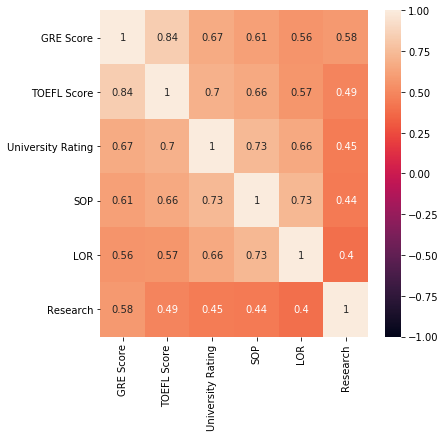

In [10]:
x=ds1[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']]
corr_ds1=x.corr(method="pearson")
plt.figure(figsize=(6,6))
sns.heatmap(corr_ds1,vmax=1.0,vmin=-1.0,annot=True)

Removing the highly corelated variable i.e. GRE score

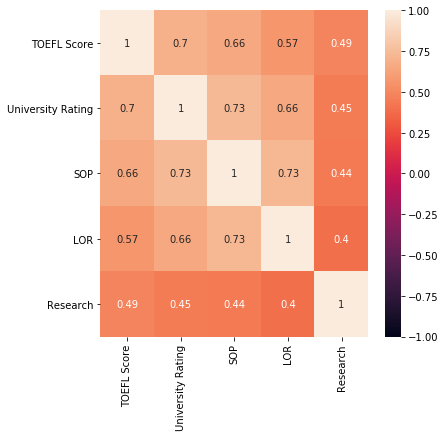

In [11]:
x=ds1[['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']]
corr_ds1=x.corr(method="pearson")
plt.figure(figsize=(6,6))
sns.heatmap(corr_ds1,vmax=1.0,vmin=-1.0,annot=True)

### Splitting in train and test data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)  

## Regression using Oridnary Least Square

In [13]:
ols = stm.OLS(y_train, x_train)
result = ols.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              5447.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):                   2.14e-303
Time:                        19:30:56   Log-Likelihood:                          357.34
No. Observations:                 320   AIC:                                     -704.7
Df Residuals:                     315   BIC:                                     -685.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

p-value of SOP > 0.05. Therefore we remove the variable & again check the OLS Regression Results

In [14]:
x=ds1[['TOEFL Score', 'University Rating', 'LOR', 'Research']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)  
ols = stm.OLS(y_train, x_train)
result = ols.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              6787.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):                   6.58e-305
Time:                        19:30:57   Log-Likelihood:                          356.33
No. Observations:                 320   AIC:                                     -704.7
Df Residuals:                     316   BIC:                                     -689.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Performing Linear Regression

In [15]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm.score(x_test, y_test)

0.7112482237284815

In [17]:
y_pred_new=lm.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print(rmse)

0.07242853984215275


### Performing SVM

In [18]:
regressor = SVR(kernel='rbf') #radial basis function
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
regressor.score(x_test, y_test)

0.656580244875653

A slight less value than that we observed in Linear and OLS models

In [20]:
y_pred_new=regressor.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print(rmse)

0.07898780307925965


### Performing Decision Tree

In [21]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [22]:
tree.score(x_test, y_test)

0.42559064858605855

A poor R squared value tells us Decision Tree is not a good model to apply on this dataset

In [23]:
y_pred_new=tree.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print(rmse)

0.10215465195803208


In [24]:
co_effs = pd.DataFrame(lm.coef_, index=['TOEFL Score', 'University Rating', 'LOR', 'Research'], 
                       columns=['Co-eff Values'])
co_effs

,Co-eff Values
TOEFL Score,0.010822
University Rating,0.022103
LOR,0.036735
Research,0.044429


Here we conclude that a 1 unit increase in Research will lead to an increase in 0.044429 in Chances of admission.

Similarly for a 1 unit change in LOR will increase the lead to an increase in 0.036735 in Chances of admission.